## ADS 505 Final Project
### Team 1
### Angela Zhang
### Emina Belekanich
### Luke Awino

A stroke occurs when blood supply is blocked or a blood vessel bursts in the brain. Strokes can cause brain damage, long-term disabilities and in the most severe cases, death. According to the Centers for Disease Control and Prevention, someone in the United States will suffer from a stroke every forty seconds. Along with cancer and heart disease, strokes are a leading cause of death for Americans. There are a wide variety of factors that can contribute to a person’s likelihood of suffering from a stroke. Some risk factors include smoking, obesity, age and high blood pressure (Centers for Disease Control and Prevention [CDC], 2021). Stroke prediction is essential in saving lives. Therefore, it is important that we understand the causes of a stroke in order to make better recommendations to those at risk through the utilization of predictive modeling.

In [1]:
#import the packages
%matplotlib inline
%config IPCompleter.greedy=True

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn import preprocessing
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge, LogisticRegressionCV, LogisticRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from dmba import gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [2]:
#load the dataset
stroke_df = pd.read_csv('/Users/Luke-Workstation/Desktop/ADS 505/datasets/healthcare-dataset-stroke-data.csv')
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Inspecting the raw data is an important step in optimizing the best models. We begin our exploratory data analysis by importing
relevant packages and the chosen dataset into the environment. Following this step, the structure of the dataset is acquired.

In [3]:
stroke_df.shape

(5110, 12)

In [4]:
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Inspecting statistical measures for numerical variables allows us to detect outliers and handle missing data.

In [5]:
stroke_df.describe() #summary statistics for the numerical variables

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke_df.dtypes # check the data types

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
counts = stroke_df.nunique() #check for unique counts. need to check gender for the three different counts, work type and smoking status
counts


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
stroke_df['gender'].value_counts()# checking gender categories

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
stroke_df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [10]:
stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
stroke_df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [12]:
stroke_df.describe(include=['O'])# statistical statistics for categorical variables

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Bar plots can be used to compare distributions for categorical variables. We can visualize which subgroups tend to be the most
common and how each group compares to one another.

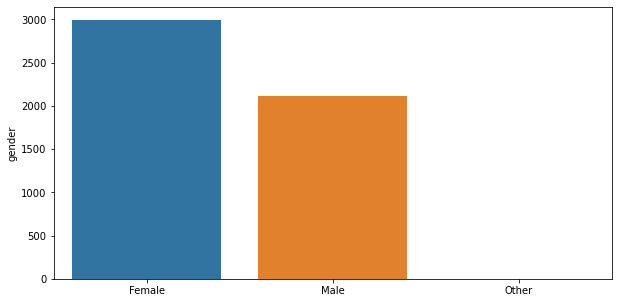

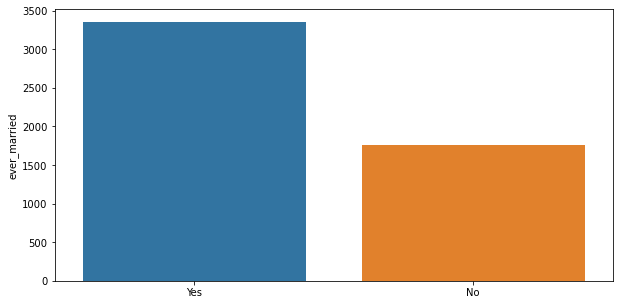

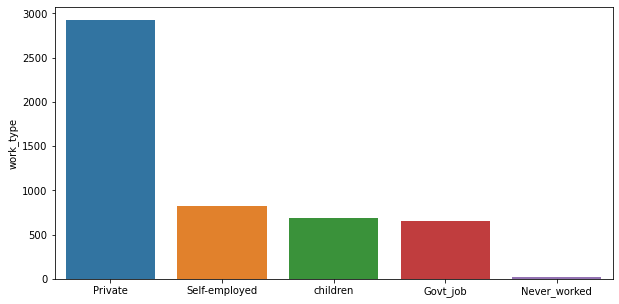

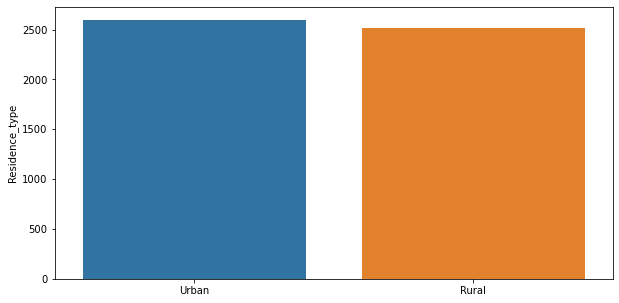

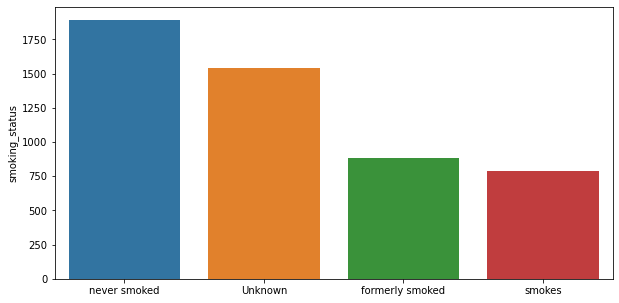

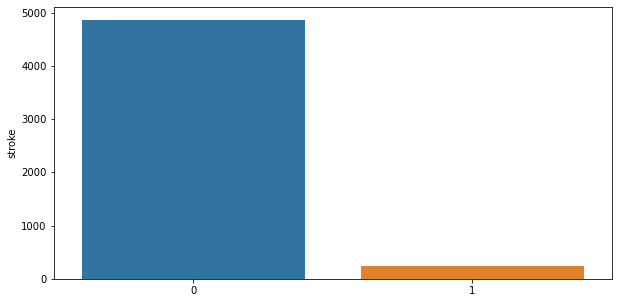

In [13]:
#plotting the categorical variables
stroke_barplot = stroke_df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']]

for i in stroke_barplot.columns:
    plt.figure(figsize=(10,5))
    cat_num = stroke_df[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

In [14]:
stroke_df.isna().sum() # check for missing values bmi has 201 missing values 4% of the values are missing

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
stroke_df[stroke_df.columns[stroke_df.isna().any()]] # further exploration on the missing bmi values 

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


A histogram can be used to visualize the distribution of numerical variables. We use a histogram to look at BMI in order to determine
how missing values should be handled. As shown above, BMI has 201 missing values and must be handled appropriately.

<AxesSubplot:>

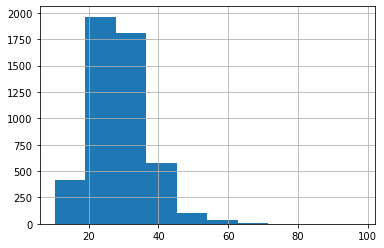

In [16]:
stroke_df['bmi'].hist() #plot histogram for bmi

Further analyzing BMI, it appears that while median value for BMI is slightly lower for those who have not suffered from a stroke, there
are more outliers and a larger range in values.

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

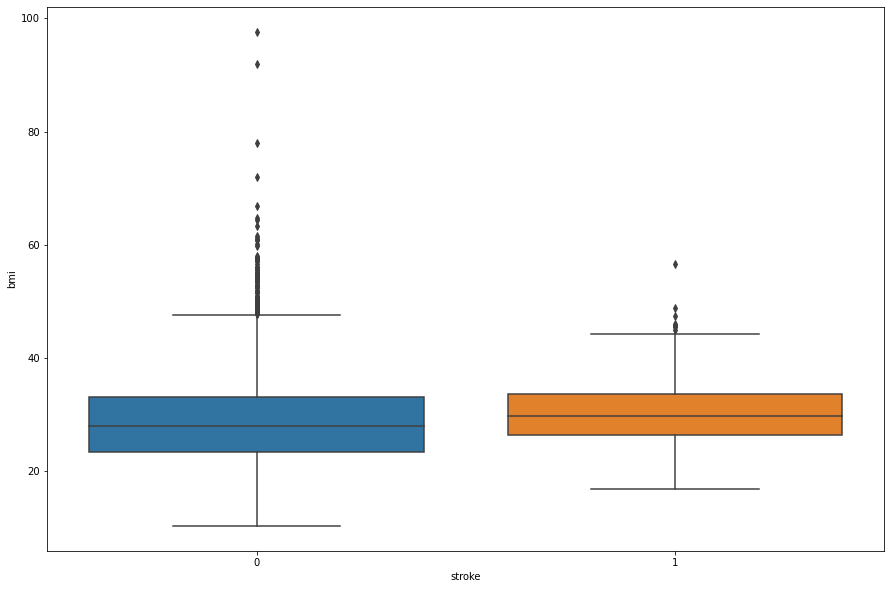

In [17]:
plt.figure(figsize=(15,10)) # boxplot for bmi
sns.boxplot(x='stroke',y='bmi',data=stroke_df)

Correlation matrix gives the relationship between our variables and can assist with dimensionality reduction.

<Figure size 3240x1800 with 0 Axes>

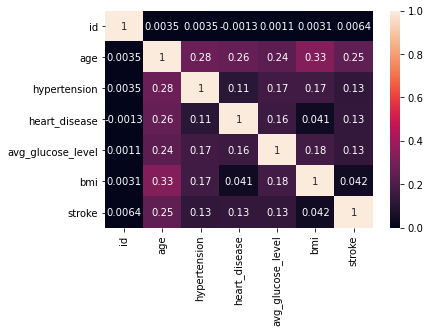

<Figure size 3240x1800 with 0 Axes>

In [18]:
corrMatrix = stroke_df.corr()
sns.heatmap(corrMatrix, annot=True )
plt.figure(figsize=(45,25))

Checking correlation between numerical predictors can assist with dimensionality reduction by removing correlated features

In [19]:
stroke_df.corr() #checking correlation between the numerical predictors

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [20]:
stroke_df.groupby('stroke').count() # eda on predictor variable

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4700,4861
1,249,249,249,249,249,249,249,249,249,209,249


Following an extensive EDA phase, four features are dropped from the dataset in order to improve model performance and decrease
computation time.

In [21]:
# further exploration
import dabl
dabl.clean(stroke_df, verbose=2).head(2)

Detected feature types:
continuous      4
dirty_float     0
low_card_int    0
categorical     7
date            0
free_string     0
useless         1
dtype: int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked


Target looks like classification


C:\Users\Luke-Workstation\anaconda3\lib\site-packages\dabl\plot\supervised.py:545: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Linear Discriminant Analysis training set score: 0.500


C:\Users\Luke-Workstation\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\Luke-Workstation\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\Luke-Workstation\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


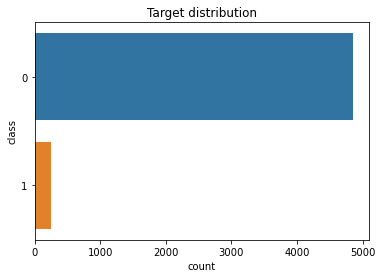

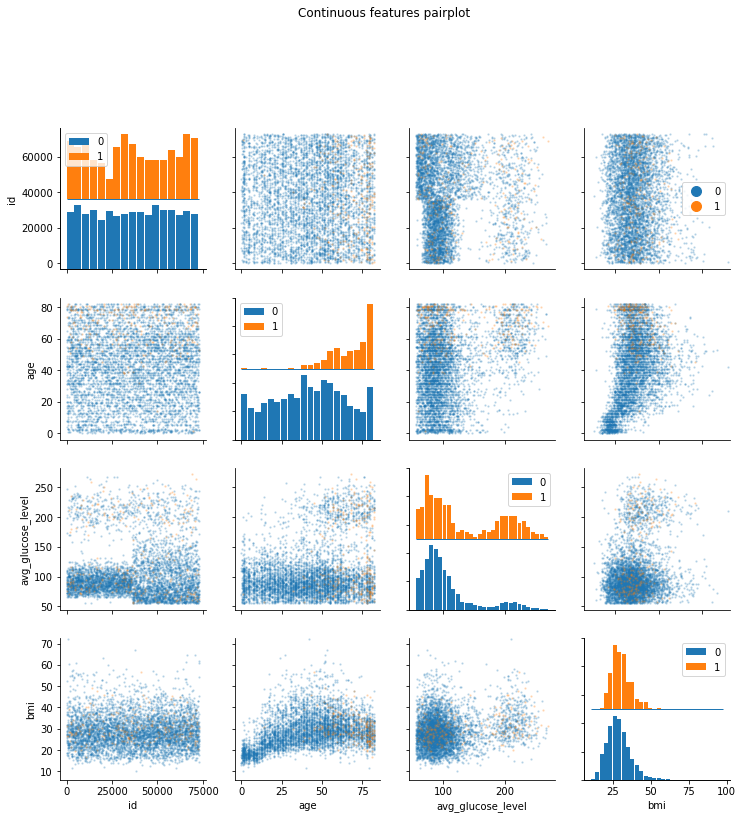

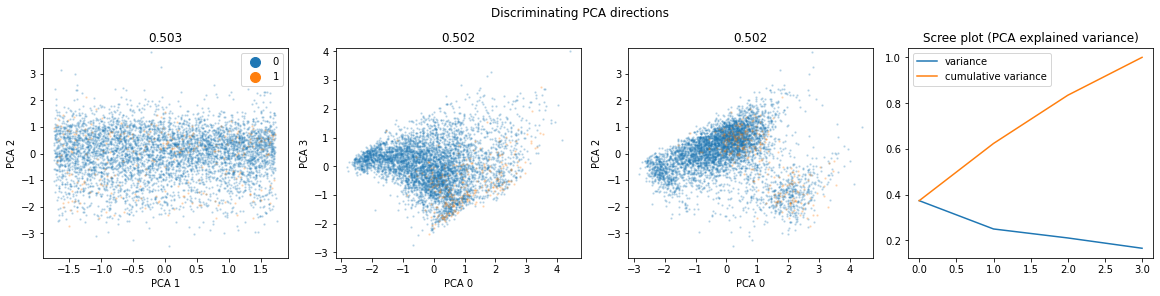

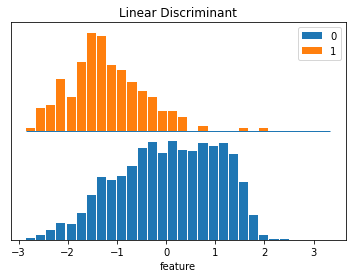

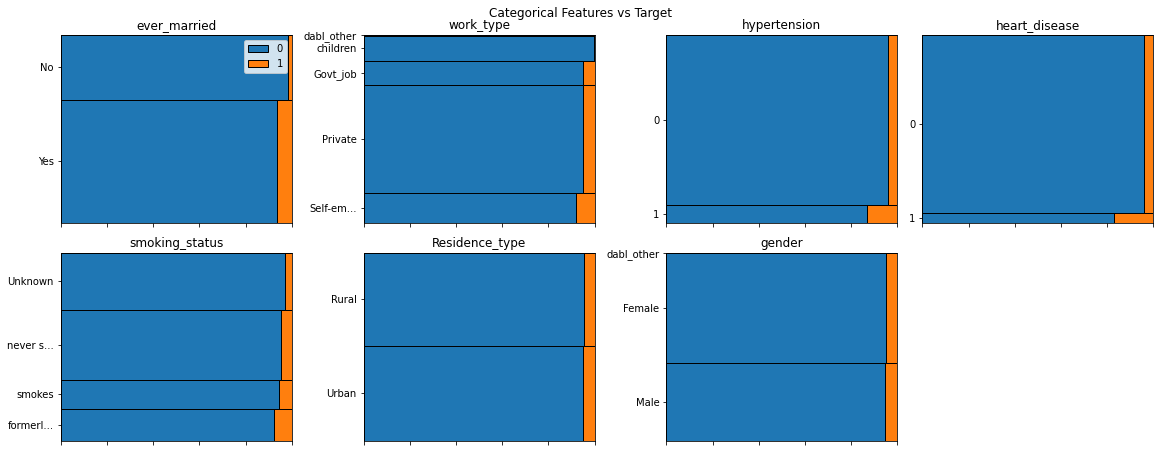

In [22]:

# further exploration of the dataset
dabl.plot(stroke_df, 'stroke')

In [23]:
# drop the lifestyle columns from the dataset
stroke_health= stroke_df.drop(columns =['Residence_type', 'work_type', 'ever_married','id'])
stroke_health.head()


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


We convert the blood sugar column from numerical to categorical in order to improve signal to noise ratio. As a result, we are able to fit
our model according to 4 'bins.' These bins decrease the impact of noise. The four bins are: low, normal, borderline and high.

In [24]:
#feature engineering Create new column for blood sugar with 4 categories
# stroke_health['Blood_sugar'] = pd.cut(stroke_health.avg_glucose_level, bins=4,
#        labels=["low", "normal", "borderline","high"]).head()
# stroke_health.head()

stroke_health['Blood_sugar'] = pd.cut(stroke_health.avg_glucose_level, bins=[0,50,72,150,271],
       labels=["low", "normal", "borderline","high"]).head()
stroke_health.head()


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Blood_sugar
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1,high
1,Female,61.0,0,0,202.21,NaN,never smoked,1,high
2,Male,80.0,0,1,105.92,32.5,never smoked,1,borderline
3,Female,49.0,0,0,171.23,34.4,smokes,1,high
4,Female,79.0,1,0,174.12,24.0,never smoked,1,high


In [25]:
stroke_health['Blood_sugar'].value_counts(normalize=True)

high          0.8
borderline    0.2
low           0.0
normal        0.0
Name: Blood_sugar, dtype: float64

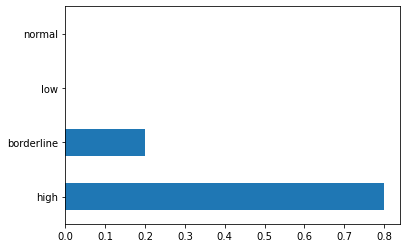

In [26]:
#plot blood sugar
stroke_health['Blood_sugar'].value_counts(normalize=True).plot(kind='barh')
plt.show()

The dataset is inspected for any missing values which are subsequently imputed by the mode value. This approach is the most
representative of the sample and unlike K-Nearest Neighbors, does not yield negative values.

In [27]:
# fill missing bmi values with mode
stroke_health['bmi'] = stroke_health['bmi'].fillna(stroke_health['bmi'].mode()[0])

In [28]:
stroke_health.dtypes

gender                 object
age                   float64
hypertension            int64
heart_disease           int64
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
Blood_sugar          category
dtype: object

Transforming categorical values to numerical, because models can only handle only numeric values. In this instance our categorical values are gender, blood_sugar and smoking_status. 

In [29]:
le = preprocessing.LabelEncoder()

# Transform the categorical columns for modeling
stroke_health['gender'] = le.fit_transform(stroke_health.gender)
stroke_health['Blood_sugar'] = le.fit_transform(stroke_health.Blood_sugar)
stroke_health['smoking_status'] = le.fit_transform(stroke_health.Blood_sugar)
stroke_health.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Blood_sugar
0,1,67.0,0,1,228.69,36.6,1,1,1
1,0,61.0,0,0,202.21,28.7,1,1,1
2,1,80.0,0,1,105.92,32.5,0,1,0
3,0,49.0,0,0,171.23,34.4,1,1,1
4,0,79.0,1,0,174.12,24.0,1,1,1


We are now partitioning the dataset into 60% validation and 40% train. Splitting the data will help us determine whether the model's guesses are correct.

Our first model is Naive Bayes classifier. We chose this model because it is easy and fast to predict the class of the test data set.

In [31]:
# naive bayes model

# run naive Bayes
stroke_nb = MultinomialNB(alpha=0.09)
stroke_nb.fit(train_X, train_y)

# predict probabilities
predProb_train = stroke_nb.predict_proba(train_X)
predProb_valid = stroke_nb.predict_proba(valid_X)

# predict class membership
y_valid_pred = stroke_nb.predict(valid_X)
y_train_pred = stroke_nb.predict(train_X)

# classification summary for the naive Bayes
classificationSummary(train_y, stroke_nb.predict(train_X))

print(classification_report(valid_y, stroke_nb.predict(valid_X), digits=4))

Confusion Matrix (Accuracy 0.8604)

       Prediction
Actual    0    1
     0 2567  350
     1   78   71
              precision    recall  f1-score   support

           0     0.9739    0.8843    0.9269      1944
           1     0.1935    0.5400    0.2850       100

    accuracy                         0.8674      2044
   macro avg     0.5837    0.7121    0.6059      2044
weighted avg     0.9358    0.8674    0.8955      2044



Naive Bayes model yields 93.58% precision, recall 86.74%, and f-1 score 89.55%.


Our second model is Logistic Regression model. We chose this model because of its simplicity and easy implementation.

In [32]:
#logistic regression model
#l2 penalty to avoid regularization

logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y, )

logit_reg_pred_valid = logit_reg.predict(valid_X)
logit_reg_pred_train = logit_reg.predict(train_X)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=train_X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.5302911544446849
         gender       age  hypertension  heart_disease       bmi  \
coeff  0.117552  0.067771      0.501984       0.314333  0.013988   

       smoking_status  Blood_sugar  
coeff        -1.98677     -1.98677  

AIC -411.3951527038125


In [33]:
# classification summary for the logistic regression
classificationSummary(train_y, logit_reg.predict(train_X))

print(classification_report(valid_y, logit_reg.predict(valid_X), digits=4))

Confusion Matrix (Accuracy 0.9521)

       Prediction
Actual    0    1
     0 2917    0
     1  147    2
              precision    recall  f1-score   support

           0     0.9525    1.0000    0.9757      1944
           1     1.0000    0.0300    0.0583       100

    accuracy                         0.9525      2044
   macro avg     0.9762    0.5150    0.5170      2044
weighted avg     0.9548    0.9525    0.9308      2044



Here we are adding class weight to our logistic regression to balance highly imbalanced data. 

In [34]:
#logistic regression model
#add class weights to balance the Y variable to adress class imbalance

bal_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear',class_weight='balanced')
bal_reg.fit(train_X, train_y, )

bal_reg_pred_valid = bal_reg.predict(valid_X)
bal_reg_pred_train = bal_reg.predict(train_X)

print('intercept ', bal_reg.intercept_[0])
print(pd.DataFrame({'coeff': bal_reg.coef_[0]}, index=train_X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, bal_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  6.599042139757904
         gender      age  hypertension  heart_disease       bmi  \
coeff -0.003709  0.06887       0.58086       0.574634  0.014841   

       smoking_status  Blood_sugar  
coeff       -2.782265    -2.782265  

AIC 3168.5451303642963


In [35]:
# classification summary for the balanced logistic regression
classificationSummary(train_y, bal_reg.predict(train_X))

print(classification_report(valid_y, bal_reg.predict(valid_X), digits=4))

Confusion Matrix (Accuracy 0.7260)

       Prediction
Actual    0    1
     0 2108  809
     1   31  118
              precision    recall  f1-score   support

           0     0.9860    0.7227    0.8341      1944
           1     0.1292    0.8000    0.2225       100

    accuracy                         0.7265      2044
   macro avg     0.5576    0.7614    0.5283      2044
weighted avg     0.9441    0.7265    0.8042      2044



Balanced Logistic Regression model yields 94.41% precision, recall 72.65%, and f-1 score 80.42%.

Our third model is Random Forest. We chose this model due to its  high level of accuracy and ability to perform both regression and classification tasks. 

In [36]:
#random forest model
rf = RandomForestClassifier(n_estimators=365, random_state=13, class_weight='balanced')
rf.fit(train_X, train_y)
classificationSummary(train_y, rf.predict(train_X))

print(classification_report(valid_y, rf.predict(valid_X), digits=4))

Confusion Matrix (Accuracy 0.9958)

       Prediction
Actual    0    1
     0 2904   13
     1    0  149
              precision    recall  f1-score   support

           0     0.9548    0.9887    0.9714      1944
           1     0.2903    0.0900    0.1374       100

    accuracy                         0.9447      2044
   macro avg     0.6226    0.5393    0.5544      2044
weighted avg     0.9223    0.9447    0.9306      2044



Random Forest model yields 92.23% precision, recall 94.47%, and f-1 score 93.06%.

Our last model is Linear Discriminiant model. We chose this model due to its ability to reduce dimensionality in data. 

In [37]:
#linear discriminant model
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(train_X, train_y)
classificationSummary(train_y, lda_reg.predict(train_X))

print(classification_report(valid_y, lda_reg.predict(valid_X), digits=4))


Confusion Matrix (Accuracy 0.9491)

       Prediction
Actual    0    1
     0 2905   12
     1  144    5
              precision    recall  f1-score   support

           0     0.9542    0.9959    0.9746      1944
           1     0.4667    0.0700    0.1217       100

    accuracy                         0.9506      2044
   macro avg     0.7104    0.5329    0.5482      2044
weighted avg     0.9303    0.9506    0.9329      2044



Linear Discriminant model yields 93.29% precision, recall 95.06%, and f-1 score 93.29%.

In [39]:
print(regressionSummary(valid_y, lda_reg.predict(valid_X)))


Regression statistics

               Mean Error (ME) : 0.0416
Root Mean Squared Error (RMSE) : 0.2223
     Mean Absolute Error (MAE) : 0.0494
None


Based on the abovementined scores, Linear Discriminant model had highest f-1 score and out performed the other models. Therefore, we recommend using this model for further research and data anylysis. 